In [60]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [61]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [62]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape


In [64]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2 , b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

def forward_props(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y ] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0

def back_props(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)* deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2
    

In [65]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1 , b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_props(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_props(Z1, A1, Z2, A2, W1 , W2 ,X , Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [66]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 1 ... 4 4 4] [3 5 1 ... 8 9 8]
0.10634146341463414
Iteration:  10
[4 8 1 ... 2 3 0] [3 5 1 ... 8 9 8]
0.17480487804878048
Iteration:  20
[4 9 1 ... 7 3 0] [3 5 1 ... 8 9 8]
0.24692682926829268
Iteration:  30
[4 9 1 ... 8 3 2] [3 5 1 ... 8 9 8]
0.3035609756097561
Iteration:  40
[4 9 1 ... 8 3 2] [3 5 1 ... 8 9 8]
0.35790243902439023
Iteration:  50
[4 9 1 ... 8 9 2] [3 5 1 ... 8 9 8]
0.40539024390243905
Iteration:  60
[3 9 1 ... 8 9 2] [3 5 1 ... 8 9 8]
0.451
Iteration:  70
[3 9 1 ... 9 9 2] [3 5 1 ... 8 9 8]
0.4928292682926829
Iteration:  80
[3 9 1 ... 9 9 2] [3 5 1 ... 8 9 8]
0.5260487804878049
Iteration:  90
[3 9 1 ... 9 9 2] [3 5 1 ... 8 9 8]
0.5506585365853659
Iteration:  100
[3 9 1 ... 9 9 2] [3 5 1 ... 8 9 8]
0.5743658536585365
Iteration:  110
[3 9 1 ... 8 9 2] [3 5 1 ... 8 9 8]
0.5956829268292683
Iteration:  120
[3 4 1 ... 8 9 2] [3 5 1 ... 8 9 8]
0.6160975609756097
Iteration:  130
[3 4 1 ... 8 9 2] [3 5 1 ... 8 9 8]
0.6345853658536585
Iteration:  140
[3 4 1 ..

In [67]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_props(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


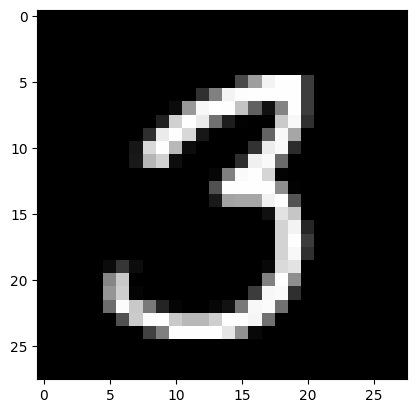

Prediction:  [8]
Label:  5


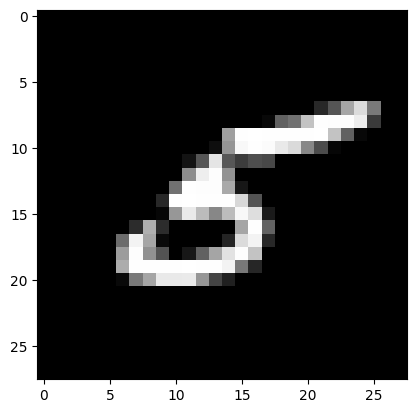

Prediction:  [1]
Label:  1


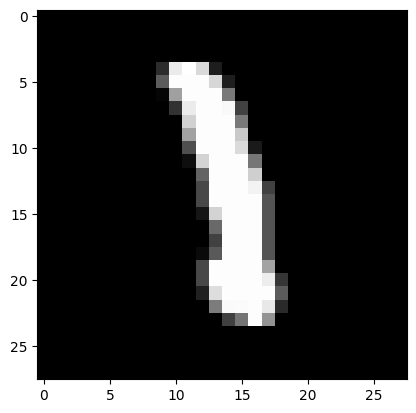

Prediction:  [9]
Label:  4


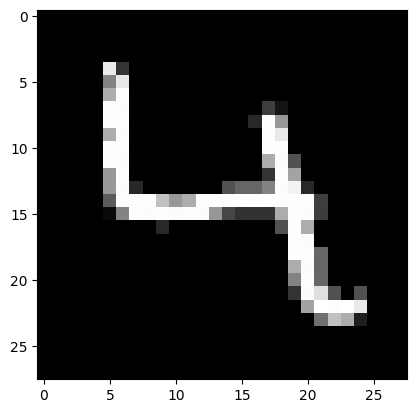

In [68]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)